![image](https://www.technotification.com/wp-content/uploads/2018/09/Renewable-Energy-Ideas.jpg)

Image source: [technotification](https://www.technotification.com/2018/09/amazing-renewable-energy-ideas.html)

This notebook aims to predict a building's energy consumption over 2017 and 2018 using the data from 2016 in 4 different consumpiton categories (electricity, chilled water, steam, hot water) using ASHRAE data, which is our problem statement as well.

This is a *supervised machine learning model*, meaning based on the columns available in the datasets and data from 2016, we are going to train the model to predict an energy consumption of a building in each category. Since, consumption values are labeled as `meter_reading` and they are continuous, we are going to apply *regression techniques* to generate predictions on meter_reading. 

It is a highly debated and popular competition in Kaggle currently, however my main motivation is to contribute to make energy-efficient buildings by estimating its energy consumption. It seemed like a good start to save our energy for future!

There will be 3 notebooks covering the complete machine learning building pipeline. 

This notebook will focus on parts 1 and 2 and provide information about the datasets with a detailed EDA.

**1) Understand, Cleand and Format Data**

**2) Exploratory Data Analysis**

3) Feature Engineering & Selection

4) Compare Several Machine Learning Models

5) Perform Hyperparameter Tuning and Cross Validation

6) Evaluate Model with Test Data

7) Interpret Model Results

8) Submissions & Summary & Conclusions

* [Notebook 2](https://www.kaggle.com/cereniyim/save-the-energy-for-the-future-2-fe-lightgbm) will cover 3, 4 and 5 be focusing on building the optimal machine learning model.
* [Notebook 3](https://www.kaggle.com/cereniyim/save-the-energy-for-the-future-3-predictions) will cover 6, 7 and 8 be focusing on generating the predictions with the best model and summary for the whole project.

Machine Learning application and building is not a linear and one time process. Steps above enable me to follow a structured way for an end-to-end machine project flow and preparation for the each step ahead. All in all, steps might be modified or revisited according to findings. You can use the table of contents to navigate to each section and visual 👇

Enjoy reading !

# <a id='top'> Table of Contents </a>
- <a href='#1'> 1. Undserstand, Clean and Format Data </a>
  - <a href='#1-1'> 1.1. Load data into dataframes </a>
  - <a href='#1-2'> 1.2. Reduce the memory size </a>
  - <a href='#1-3'> 1.3. Information about the training datasets </a>
    - <a href='#1-3-1'> 1.3.1. Building dataset </a>
    - <a href='#1-3-2'> 1.3.2. Weather_train dataset </a>
    - <a href='#1-3-3'> 1.3.3. Train dataset </a>
  - <a href='#1-4'> 1.4. Information about the test datasets </a>
    - <a href='#1-4-1'> 1.4.1 Test dataset </a>
    - <a href='#1-4-2'> 1.4.2 Weather_test </a>
  - <a href='#1-5'> 1.5. Findings from Understand, Clean, Format Data </a>


- <a href='#2'> 2. Exploratory Data Analysis </a>
  - <a href='#2-1'> 2.1. Distribution of meter reading </a>
    - <a href='#2-1-1'> 2.1.1. Consolidated distribution of meter reading </a>
    - <a href='#2-1-2'> 2.1.2. Consolidated distribution of positive meter reading values </a>
    - <a href='#2-1-3'> 2.1.3. Distribution of meter reading among different meter categories </a>
    - <a href='#2-1-4'> 2.1.4. Distribution of positive meter reading values among different meter categories </a>
    - <a href='#2-1-5'> 2.1.5. Average daily meter reading values over 2016 </a>
  - <a href='#2-2'> 2.2. Meter reading VS weather_train data </a>
    - <a href='#2-2-1'> 2.2.1. Prepare & merge dataframes </a>
    - <a href='#2-2-2'> 2.2.2. Average daily weather variable values over 2016 </a>
    - <a href='#2-2-3'> 2.2.3. Pairplot of meter reading vs weather data </a>
  - <a href='#2-3'> 2.3. Meter reading VS building data categorical features </a>
    - <a href='#2-3-1'> 2.3.1. Prepare & merge dataframes </a>
    - <a href='#2-3-2'> 2.3.2. Meter reading distribution among primary uses </a>
    - <a href='#2-3-3'> 2.3.3. Meter reading distribution among site id as violinplot </a>
  - <a href='#2-4'> 2.4. Meter reading VS building data continuous features as scatterplots </a>
    - <a href='#2-4-1'> 2.4.1. Scatter plot of meter reading VS square feet </a>
    - <a href='#2-4-2'> 2.4.2. Scatter plot of meter reading VS age of the building </a>
    - <a href='#2-4-3'> 2.4.3. Scatter plot of meter reading VS floor count </a> 
  - <a href='#2-5'> 2.5. Findings from exploratory data analysis </a>


- <a href='#3'> Conclusions </a>

**Imports**:
<br> I will use numpy and pandas for data munging and manipulation. For the visualizations I will discover some [plotly](https://plot.ly/python/) in this project and create interactive visuals where possible. <br/>

In [ ]:
# for data manipulation
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# for date manipulation
from datetime import datetime

# for visualization: matplotlib
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline
# to display visuals in the notebook

# for visualization: seaborn
import seaborn as sns
sns.set_context(font_scale=2)

# for visualization: plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import iplot

# to cleanup memory usage
import gc

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# <a id='1'> 1. Understand, Clean and Format Data </a>
<a href='#top'>Back to top </a>

Very first observation is training and test data spans in 5 different csv files. If you look at the [data tab of the competition](https://www.kaggle.com/c/ashrae-energy-prediction/data) you will see that:
- `train.csv`, `test.csv`, `weather_train.csv` and `weather_test.csv` are time-series data, with hourly measurements.
- `building_metadata.csv` contains the characteristics of a building such as:
  - site id of the building
  - primary use
  - square feet
  - year built
- In the weather datasets, there are features related to wind, clouds, temperature and pressure.
- Weather_train dataset measured from 1 Jan, 2016 to 1 Jan, 2017.
- Weather_test dataset spans from 1 Jan, 2017 to 1, Jan 2019. 

So using 1 year data we are going to predict following 2 years energy consumption of a building.


Looking at the `test_csv`and `samplele_submissions.csv`, predictions will be based on:
- building_id
- meter (energy consumption category)
- timestamp

## <a id='1-1'> 1.1. Load data into dataframes </a>
<a href='#top'>Back to top </a>

Time series data will be loaded by parsing `timestamp`column to enabling timestamp column to be formatted as datetime data type and as index.

In [ ]:
# path
path = "/kaggle/input/ashrae-energy-prediction"

# train  data
building = pd.read_csv(path + "/building_metadata.csv")
weather_train = pd.read_csv(path + "/weather_train.csv", 
                            index_col=1, parse_dates = True)
train = pd.read_csv( path + "/train.csv", 
                    index_col=2, parse_dates = True)

In [ ]:
# look at the number of rows and columns
print('Size of the building dataset is', building.shape)
print('Size of the weather_train dataset is', weather_train.shape)
print('Size of the train dataset is', train.shape)

In [ ]:
# test data
weather_test = pd.read_csv(path + "/weather_test.csv", 
                           index_col=1, parse_dates = True)
test = pd.read_csv(path + "/test.csv", 
                   index_col=3, parse_dates = True)
# submission data
sample_submission = pd.read_csv( path + "/sample_submission.csv")

In [ ]:
# look at the number of rows and columns
print('Size of the weather_test dataset is', weather_test.shape)
print('Size of the test dataset is', test.shape)
print('Size of the sample_submission is', sample_submission.shape)

In [ ]:
del sample_submission
gc.collect()

We are dealing with some big datasets here (20 and 40 million rows). We have 41 million rows to predict with the built model. 

To save some space from the memory, I am going to delete unused dataframes and use a function built as part of this [popular notebook](https://www.kaggle.com/caesarlupum/ashrae-start-here-a-gentle-introduction#2.-Imports-) to reduce the memory size use of the datasets.

## <a id='1-2'> 1.2. Reduce the memory size </a>
<a href='#top'>Back to top </a>

This function converts data types in such a way that, they allocate less space in the memory. Then, reports the size of the reduction.

In [ ]:
## Function to reduce the DF size
def reduce_memory_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
reduce_memory_usage(building)
reduce_memory_usage(weather_train)
reduce_memory_usage(train)

reduce_memory_usage(weather_test)
reduce_memory_usage(test)

## <a id='1-3'> 1.3. Information about the training datasets </a>
<a href='#top'>Back to top </a>

Since there are 3 csv files, I will use pandas_profiling to get the quick glance of the data for the datasets with less than 1 million rows. 

Pandas_profiling is a great library to display information about 
* Essentials
* Quantile statistics
* Descriptive statistics
* Most frequent values
* Histogram
* Correlations (even rejects a column if a collinear correlation is found) 
<br> and provides a Sample consisting of first and last rows. </br> 

The further details about the dataset can be observed by clicking on each tab and Toggle Details buttons per column.

The best part of the pandas profiling: It delivers whole bunch of information with just one line of code! If you want to dive deeper into pandas_profiling, you can check their [GitHub page](https://pandas-profiling.github.io/pandas-profiling/docs/).

### <a id='1-3-1'> 1.3.1. Building dataset <a/>
<a href='#top'>Back to top</a>

In [ ]:
pp.ProfileReport(building)

**Summary from the Report:**
* `Building_id` is the primary key for this dataset.
* Observations coming from 1448 buildings.
* `building_id` and `site_id`are collinear features.
* More than 50% of the values are missing at columns`floor_count`and `year_built` which easily captured in the first raws of the data.
* Except `primary_use`all of the columns are numeric.
* `primary_use` column is categorical, most of the values being Education, Office and Public Assembly.
* Looking at the `floor_count` histogram, data is gathered mostly from 1 to 5 floor buildings. Whether to keep or drop this column will be decided after looking at how this feature contributes to determining meter_reading.
* Looking at the `square_feet` histogram most of the buildings are smaller than 200.000 square feet. There are few extremely large buildings: square feet is more than 800.000 square feet.
* We have buildings from every age: 2 year-old buildings to 100-year-old buildings.

In [ ]:
building.sort_values(by="square_feet", ascending=True).tail()

Those extremely large buildings that lack year_built or floor_count values and can be named as outliers. I am going to determine how to handle outliers at the end of this notebook.

### <a id='1-3-2'> 1.3.2. Weather_train dataset <a/>
<a href='#top'>Back to top</a>

In [ ]:
pp.ProfileReport(weather_train)

**Summary from the report:**
* Since this is a time-series data, we have much more observations (139.772) than the building dataset.
* Except timestamp, all of the features are numeric and in following units and ranges:

|   | Feature           | Range                              | Description
|---|-------------------|------------------------------------|-------------------------------
| 1 | air_temperature   | -28 to 47 Degrees Celsius          | 
| 2 | cloud_coverage    | 0 to 9 oktas                       | Portion of the sky covered in clouds
| 3 | dew_temperature   | -35 to 26 Degrees Celsius          | The temperature at which the air can no longer "hold"                                                                  all of the water vapor. The dew temperature is aways                                                                    lower than (or equal to) the air temperature.
| 4 | precip_depth_1_hr | -1 to 343 Millimeters              | The amount of rain, snow, hail, etc., that has fallen at                                                                a given place within a given period.
| 5 | sea_level_pressure| 968 to 1046 Millibar/hectopascals  | The average atmospheric pressure at mean sea level
| 6 | wind_direction    | 0 to 360 degrees                   | Direction that the wind comes
| 7 | wind_speed        | 0 to 19 Meters per second          |

<br>
* We have equal number of samples coming from 16 different sites.
* It seems there are some extreme observations in this dataset, which can be observed by clicking toggle details and extreme values tab
* `cloud_coverage`, `precip_depth_1_hr`, `sea_level_pressure` and `wind_direction` have significantly high missing values.

### <a id='1-3-3'> 1.3.3. Train dataset </a>
<a href='#top'>Back to top </a>

This is the biggest dataset in amongst the training datasets. Thus, pandas_profiling crunches data in higher run-times. I will use handy pandas exploration functions to explore that dataset.

In [ ]:
train.info()

In [ ]:
print("Percentage of missing values in the train dataset")
train.isna().sum()

In [ ]:
train.describe(include="all")

* `meter_reading` is the target that we are trying to predict.
* `meter` is the meter category, representing:
  * 0: electricity
  * 1: chilled water
  * 2: steam
  * 3: hot water
* `meter_reading` values ranges between 0 and 22 million. We are going to take a closer look at the max value and investigate the reasons behind.
* We don't have any missing values in the train dataset.

In [ ]:
train.head()

### <a id='1-4'> 1.4. Information about the test datasets </a>
<a href='#top'>Back to top </a>

### <a id='1-4-1'> 1.4.1. Test dataset </a>

In [ ]:
test.describe(include="all")

### <a id='1-4-2'> 1.4.2 Weather_test </a>
<a href='#top'>Back to top </a>

In [ ]:
pp.ProfileReport(weather_test)

Weather_test's column values and ranges are consistent with the weather_train's column values and ranges.

In [ ]:
del weather_test, test
gc.collect()

## <a id='1-5'> 1.5. Findings from Understand, Clean, Format Data <a/>
<a href='#top'>Back to top</a>

#### Relationships between tables:
- building_id is the primary key of the building dataset.
- building_id is the foreign key for the train dataset.
- site_id is the foreign key for weather_train dataset.

---------------------------------------------------------
In total, there are 15 unique columns in all training datasets excluding target column. Those columns are self-explanatory and clear. Excluding timestamp, rest are potential candidates for feature set.

`meter_reading` is the target we are trying to predict. `meter_reading` represents energy consumption of a building for a 1-hour period in different meter reading categories.

`timestamp` columns are converted to date-time format and seems like measurements are recorded in hourly periods.

Although we have missing values and outliers in the training datasets, I will keep them all for now, and decide how to handled them at the end of the notebook.

There are nearly 20 million `meter_reading` values in the train dataset which are observed among 1448 buildings between 1 Jan, 2016 and 1 Jan, 2017; most of them being electricity meter observations.

There are 40 million `meter_reading`values in the test dataset observed among the same buildings betweeen 1 Jan 2017 and 1 Jan 2019.

# <a id='2'> 2. Exploratory Data Analysis </a>

I will run a detailed exploratory data analysis by visualizing trends, correlations and distributions between target and feature variables. Thanks to the pandas profiling I have already observed the single variable distributions of building and weather_train columns. So, I will start by looking at the high-level distribution of meter reading values.

## <a id='2-1'> 2.1. Distribution of meter reading </a>

Meter reading values will be visualized without any categories, among meter categories and as a time-series data.

### <a id='2-1-1'> 2.1.1. Consolidated distribution of meter reading </a>
<a href='#top'> Back to top </a>

In [ ]:
# set the plot size
figsize(12,10)

# set the histogram, mean and median
sns.distplot(train['meter_reading'],
             kde=True)
plt.axvline(x=train.meter_reading.mean(), 
            linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=train.meter_reading.median(), 
            linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.title("Distribution of Meter Reading", size=14)
plt.legend(["mean", "median"])

Our very first plot already conveyed some information: Meter reading values are highly skewed.

Recall that, meter-reding values range between 0 and 22 million, this picture shows that high percentage of them are gathered around zero. And unfortunately due this high skewness it is impossible to visualize raw meter reading values and draw a histogram. 

Due to this wide range and highly skewed data the natural log(1 + meter_reading) will be visualized using [np.log1p](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html). Since the natural logarithm of zero is minus infinity (a real number to the power of some real number is never 0), np.log1p enables to transform 0 measurements to 1, including those in the visualization.

In [ ]:
# set the plot size
figsize(12,10)

# set the histogram, mean and median
sns.distplot(np.log1p(train['meter_reading']),
             kde=True)
plt.axvline(x=np.log1p(train.meter_reading.mean()), 
            linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=np.log1p(train.meter_reading.median()), 
            linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.title("Distribution of Logarithm(Meter Reading + 1) ", size=14)
plt.legend(["mean", "median"])

Distribution of logarithm(meter reading + 1) values, regardless of the category, shows a right-skewed distribution. Median value is smaller than the mean value proving this skewness. This skewness is caused by the significanlty high number of 0 and 1 measurements in the `meter_reading`. Let's look at the definition if we can get some logical explanation to 0 measurements:

> They are the Energy consumption in kWh (or equivalent). This is the real data with measurement error, which we expect will impose a baseline level of modeling error. 

Explanation implies this is a real data with some errors, due this error, there may be some missed observations in the `meter_reading`. Thus high number of 0 meter reading values shows not only zero consumption but may indicate some missing data in the `meter_reading`. Moving on with this suspicion, let's see how the distribution will look like if we exclude 0 measurements from the dataset. 

I think it is impossible for a building to consume 0 kWh energy at a given time. Every office, home at least having some fridges and other home appliances running all the time. 

Thus, I I will visualize meter reading excluding 0 measurements.

### <a id='2-1-2'> 2.1.2. Consolidated distribution of positive meter reading values </a>
<a href='#top'> Back to top </a>

In [ ]:
# create dataframe excluding 0 measurements of meter_reading and take the natural logarithm
# np.log is used this time because we don't have 0 values in the meter_reading
positive_train = train[train['meter_reading'] != 0]
positive_train['log_meter_reading'] = np.log(positive_train['meter_reading'])

In [ ]:
# set the plot size
figsize(12,10)

# set the histogram, mean and median
sns.distplot(positive_train['log_meter_reading'], 
             kde=True)
plt.axvline(x=positive_train['log_meter_reading'].mean(),
            linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=positive_train['log_meter_reading'].median(),
            linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.title("Distribution of Logarithm(Meter Reading) w/o 0 Measurements", size=14)
plt.legend(["mean", "median"])

Now, I have more concrete evidence that 0 observations represents missing values.

Moreover, this is the picture I expected to see in the first place. However, after dropping the zero values and taking the logarithm of the meter reading values, distribution shows a perfect normal distribution. Data is centered around the mean. Mean and median values are equal to each other. Taking the logarithm helped to lower the variance.

Moreover, some immediately observed outliers for log_meter_reading are around -7 and -5 and greater than 10. Let's have a closer look at the outliers:

In [ ]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(
        np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(
        np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [ ]:
# percentage of outliers in the meter_reading
print("{} percent of {} are outliers."
      .format((
              (100 * outlier_function(train, 'meter_reading')[2])
               / len(train['meter_reading'])),
              'meter_reading'))

In [ ]:
train['meter_reading'].sort_values().tail()

In [ ]:
positive_train['meter_reading'].sort_values().head()

Although I excluded 0s, there are still plenty of data points which are very close to 0.

Out of 20 million observations 8% are detected with the logic of determining [extreme outliers](https://people.richland.edu/james/lecture/m170/ch03-pos.html). We are going to decide what to do with the outliers in the target data at the end of the notebook.

### <a id='2-1-3'> 2.1.3. Distribution of meter reading among different meter categories </a>
<a href='#top'> Back to top </a>

In [ ]:
# distribution of the meter reading in meters without zeros
figsize(12,10)

#list of different meters
meters = sorted(train['meter'].unique().tolist())

# plot meter_reading distribution for each meter
for meter_type in meters:
    subset = train[train['meter'] == meter_type]
    sns.kdeplot(np.log1p(subset["meter_reading"]), 
                label=meter_type, linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Meter_reading")
plt.legend(['electricity', 'chilled water', 'steam', 'hot water'])
plt.title("Density of Logartihm(Meter Reading + 1) Among Different Meters", size=14)

Again for the visualization purposes, we are looking at the distribution of the np.log1p(meter_reading) values. 

One thing that is obvious is; significant number of observations 0 are coming from hot water, chilled water and steam consumption,meaning we have less missing values and 0 observations in the electricity usage.

This picture shows that meter reading values shows different distribution in each meter category, especially electricity consumption is different than others. Thus, meter is a signifcant variable to determine the meter_reading values. It is already included in the train and test dataset as a determinant factor.

Let's visualize the meter reading values excluding 0 measurements for different meter categories using the dataset created earlier.

### <a id='2-1-4'> 2.1.4. Distribution of positive meter reading values among different meter categories </a>
<a href='#top'> Back to top </a>

In [ ]:
# distribution of the meter reading in meters without zeros
figsize(12,10)

# plot meter_reading distribution for each meter
for meter_type in meters:
    subset = positive_train[positive_train['meter'] == meter_type]
    sns.kdeplot(subset["log_meter_reading"], 
                label=meter_type, linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Log_meter_reading")
plt.legend(['electricity', 'chilled water', 'steam', 'hot water'])
plt.title("Density of Positive Logarithm(Meter Reading) Among Different Meters", size=14)

After dropping the zero values and taking the logarithm of the meter reading values: Electricity shows a slightly different distribution than other categories. Chilled water and steam meter_reading shows similar distributions with close mean values. Hot water has the least number of datapoints and has more spikes than the other categories.

### <a id='2-1-5'> 2.1.5. Average daily meter reading values over 2016 </a>
<a href='#top'>Back to top </a>

In [ ]:
# upsample hourly observations to daily and aggregate by meter category
train_daily_avg_by_meter = (train.
                            groupby('meter').
                            meter_reading.
                            resample('d').mean().
                            reset_index())

In [ ]:
# assign meter values as column headers to create tidy-form dataframe
tidy_train_daily_avg = (train_daily_avg_by_meter.
                        pivot(index='timestamp', 
                              columns='meter', 
                              values='meter_reading').
                        reset_index())

In [ ]:
# rename column header back to meter categories
tidy_train_daily_avg.rename(columns = {0: "electricity",
                                       1: "chilled_water",
                                       2: "steam",
                                       3: "hot_water"},
                           inplace=True)

**By clicking on the legend in each category, you can observe meter categories individually.**

In [ ]:
# create meter and color dictionary
meter_dict = {'electricity': 'darkblue',
              'chilled_water':'orange',
              'steam': 'green',
              'hot_water': 'red'
             }

# create figure object and plot each meter category
fig = go.Figure()

for key in meter_dict:
    fig.add_trace(go.Line(
        x=tidy_train_daily_avg.timestamp, 
        y=tidy_train_daily_avg[key], 
        mode='lines',
        name=key,
        line_color=meter_dict[key]))

# add title and show figure
fig.update_layout(
    title_text='Average Daily Energy Consumption in kWh',
    xaxis_rangeslider_visible=True)
fig.show()

Electricity observations spread between 0 and 220 kWh. For the first half of the year consumption does not exceed 160 kWh, for the second half consumption increases and ranges between 160 and 220 kWh. In general electricity consumption shows an increasing trend in 2016.

Chilled water consumption ranges between 130 - 2500 kWh. It shows a steady increase up to 1000 kWh until September 2016. Between September and October, there are spikes in the consumption causing the range going up to 2500 kWh. Starting from November it shows downward trend.

Steam consuption has the highest and most volatile range: 0 - 80.000 kWh. There is no obvious trend in the steam consumption and steam is utilized only in the first half of the year. For the rest of the year, consumption decreases drastically which may indicate either steam is not used for the rest of the year or the errors (0 measurements) are coming from the steam category in the second half of 2016. There is an interesting spike in the Nov 9, 2016.

Hot water also is variable, however data is consistent in itself. Hot water consumtion is higher in the winter season and shows the lowest results between May and July. The data range is 0-1200 kWh having only one data point as 1200 on Dec 19, 2016. Excluding this, data is spread between 0-1000 kWh. The lesser consumption in summer season is a useful trend for our ML model to catch.

## <a id='2-2'> 2.2. Meter reading VS weather_train data </a>
<a href='#top'> Back to top </a>

### <a id='2-2-1'> 2.2.1. Prepare & merge dataframes </a>
<a href='#top'> Back to top </a>

I am going to visualize weather data available and meter_reading values per meter category to see how each observation of cloud, temperature, pressure, precipitation and wind affects meter reading. Moreover, I am going to look for reasonable explanations of extremes in the chilled water, steam and hot water consumption in the weather data.

To aggreagte hourly observations, weather train data will be upsampled to daily averages. After that, two datasets will be merged on timestamp column since this is the shared column between two.

**Weather Dataframe**

In [ ]:
# upsample weather_train dataframe to get daily means
weather_train_daily_avg = (weather_train.
                           resample('d').
                           mean())

In [ ]:
# align weather train dataframe with the train_daily_avg dataframe
weather_train_daily_avg.reset_index(inplace=True)

**Merge weather and train_daily_avg datasets**

In [ ]:
weather_vs_meter_reading = (train_daily_avg_by_meter.
                            merge(weather_train_daily_avg, 
                                  on='timestamp', 
                                  how='left'))

In [ ]:
# rename meter column
weather_vs_meter_reading['meter'] = (weather_vs_meter_reading['meter'].
                                     map({0: 'electricity',
                                          1: 'chilled_water',
                                          2: 'steam',
                                          3: 'hot_water'}))

### <a id='2-2-2'> 2.2.2. Average daily weather variable values over 2016 </a>
<a href='#top'> Back to top </a>

Spikes and anomalies detected in the section *2.1.3.Average daily meter reading values over 2016* will be investigated while plotting average daily values of weather variables.

In [ ]:
# create weather variables and color dictionary
weather_dict = {"air_temperature": "red",
                "cloud_coverage": "orange",
                "dew_temperature": "coral",
                "precip_depth_1_hr": "olive",
                "sea_level_pressure": "teal",
                "wind_direction": "purple",
                "wind_speed": "navy" 
               }

**By clicking on the legend in each category, you can observe meter categories individually.**

In [ ]:
# create plotly object and plot weather variables against dates
fig = go.Figure()
    
for key in weather_dict:
    fig.add_trace(go
                  .Line(x=weather_vs_meter_reading['timestamp'],
                        y=weather_vs_meter_reading[key], 
                        name=key,
                        line_color=weather_dict[key]))
    
fig.update_layout(title_text='Time Series of Weather Variables')
fig.show()      

Recall Dec 19, 2016 where there is a peak int the hot_water consumption. On that date, 4th lowest air_temperature is recorded 1 degrees celcius, this might explain the spike in the hot_water consumption. Obviously, air temperature trend shows that this measurements recorded somewhere in Northern hemisphere.

Recall from the definition dew temperature it is usually lower than air_temperature. If you look at air_temperature and dew_temperatur together, it proves this statement. Especially, dew_temperature is 5 degrees lower than the air_temperature and shares the same trend as air_temperature.

Average daily cloud coverage values are between 1 and 5. Higher cloud coverage indicates cloudy days, thus in winter there are more cloudy days.

If we look at the precipt_depth_1_hr half of the year is rainy, and half of the year seems to be dry. There are some days where average daily precip_depth_1_hr goes beyond 5. 

Sea level pressure is not changing much over the year. Wind_direction will make more sense if we look at it as directions (north, south and so on). Thus I will convert them to directions. Average wind speed is around 3.5 and varies values throughout the year.

### <a id='2-2-3'> 2.2.3. Pairplot of meter reading vs weather data </a>
<a href='#top'> Back to top </a>

Pairplots are very useful to look at several continuous variables relationships in one chart. Ploly version of pairplots are scatterplots or scatter matrix.

To understand the relationship between meter_reading and weather related variables, scatter matrix of energy consumption data and weather data will be visualized and relationships & correlations will be searched.

In [ ]:
# fig = ff.create_scatterplotmatrix(
#    weather_vs_meter_reading[["meter_reading",
#                              "air_temperature",
#                              "cloud_coverage",
#                              "dew_temperature",
#                              "precip_depth_1_hr",
#                              "sea_level_pressure",
#                              "wind_direction",
#                              "wind_speed",
#                              "meter"]], diag='histogram', index='meter',
#                                  height=1400, width=1400)
# fig.update_layout(
#    title='Weather Varaibles and Meter Reading',
#    dragmode='select'
#)

# fig.show()

**By clicking on the legend in the right hand side, you can observe meter categories individually.**

In [ ]:
fig = px.scatter_matrix(weather_vs_meter_reading,
                        dimensions=["meter_reading",
                                    "air_temperature",
                                    "cloud_coverage",
                                    "dew_temperature",
                                    "precip_depth_1_hr",
                                    "sea_level_pressure",
                                    "wind_direction",
                                    "wind_speed"],
                        color="meter")

fig.update_layout(
    title='Weather Varaibles and Meter Reading',
    dragmode='select',
    width=1400,
    height=1400,
    hovermode='closest')

fig.update_traces(diagonal_visible=True)
fig.show()

**Electricity:**
- As the air and dew temperature goes up, electricity consumption increases.
- Cloud coverage, sea level pressure, precip depth 1 hour shows positive trend with the electricity consumption. Although their correlations are not as strong as temperature variables.
- Wind direction and wind speed has almost no effect in electricity consumption.

**Chilled water:**
- As the air and dew temperature rises, chilled water consumption increases.
- Other weather variables shows a slightly weaker positive trend with chilled water consumption, compared to temperature variables.

**Steam:**
- Although the data range is wider and higher than the weather variables, air temperature, dew temperature and cloud coverage shows positive trend with the steam consumption.
- Precip depth 1 hour have a small effect (with a positive trend) in determining the steam consumption.
- Rest of the weather variables does not significantly impacting steam consumption.

**Hot water:**
- Other weather variables shows positive trend with the hot water consumption.
- Air and dew temprature shows negative trend with the hot water consumption.

One other important observation is air and dew temperature are highly collinear. All of the weather variables whether it is slight or strong have an affect on energy consumption.

## <a id='2-3'> 2.3. Meter reading VS building data categorical features </a>

### <a id='2-3-1'> 2.3.1. Prepare & merge dataframes </a> 
<a href='#top'> Back to top </a> 

Meter reading values will be visualized against the categorical variables (primary_use and site_id) of building data. To do that, first train data will be grouped by building id and meter category and data will be aggreagted by mean.

In [ ]:
# group train dataset per building and meter category
train_by_building = (train.
                     groupby(["building_id", "meter"]).
                     meter_reading.mean().
                     reset_index())

In [ ]:
# merge grouped train dataframe with building dataset
building_w_meter_reading = (train_by_building.
                            merge(building, 
                                  on='building_id', 
                                  how='left'))

### <a id='2-3-2'> 2.3.2. Meter reading distribution among primary uses </a> 
<a href='#top'> Back to top </a>  

Recall from the profiling report 80% of the `primary_use` values consists of the top 5 values:
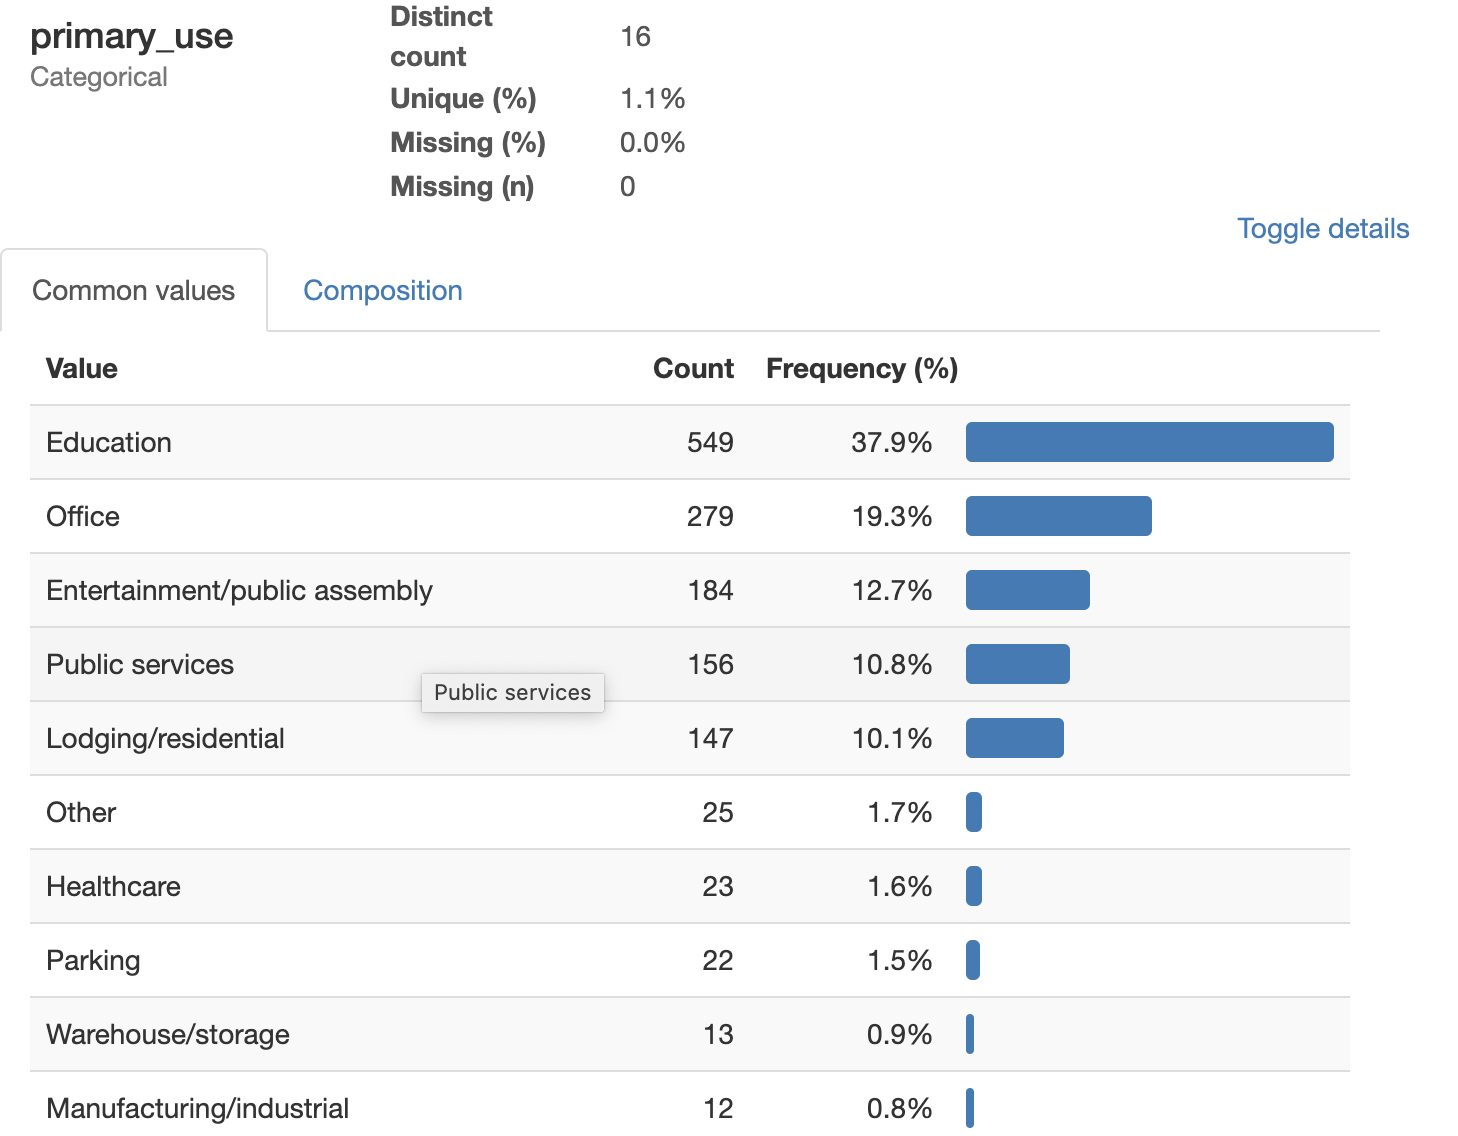


I am going to decode top 5 primary_use values as a new column first, then look for the distribution of meter reading among different primary use.

In [ ]:
# add log_meter_reading to visualize meter_reading distribution
building_w_meter_reading['log_meter_reading'] = np.log1p(building_w_meter_reading['meter_reading'])

In [ ]:
# map primary use column 
building_w_meter_reading['primary_use_mapped'] = (building_w_meter_reading['primary_use'].
                                                  map({'Office': 'Office',
                                                        'Education': 'Education',
                                                        'Entertainment/public assembly':'Entertainment/public',
                                                        'Lodging/residential': 'Residential',
                                                        'Public services': 'Public services'
                                                       }))

In [ ]:
# replace the rest with Other
building_w_meter_reading['primary_use_mapped'].replace(np.nan, 
                                                       'Other', 
                                                       regex=True, 
                                                       inplace=True)

In [ ]:
building_w_meter_reading['meter'] = (building_w_meter_reading['meter'].
                                     map({0: 'electricity',
                                          1: 'chilled_water',
                                          2: 'steam',
                                          3: 'hot_water'
                                         }))

In [ ]:
# split bıilding_w_meter_reading dataset per primary use category
education = (building_w_meter_reading[building_w_meter_reading[
    'primary_use_mapped'] == 'Education'])

office = (building_w_meter_reading[building_w_meter_reading[
    'primary_use_mapped'] == 'Office'])

entertainment_public = (building_w_meter_reading[building_w_meter_reading[
    'primary_use_mapped'] == 'Entertainment/public'])

residential = (building_w_meter_reading[building_w_meter_reading[
    'primary_use_mapped'] == 'Residential'])

public_services = (building_w_meter_reading[building_w_meter_reading[
    'primary_use_mapped'] == 'Public services'])

other = (building_w_meter_reading[building_w_meter_reading[
    'primary_use_mapped'] == 'Other'])

In [ ]:
# create distplot parameters as lists
hist_data = [education['log_meter_reading'], 
             office['log_meter_reading'],
             entertainment_public['log_meter_reading'],
             residential['log_meter_reading'],
             public_services['log_meter_reading'],
             other['log_meter_reading']]

group_labels = ['education', 'office', 'entertainment_public',
               'residential', 'public_services', 'other' ]

colors = ['#333F44', '#37AA9C', '#94F3E4', '#66CCFF', '#2C89AB', '#0324A9']

In [ ]:
# create KDE plot of log_meter_reading 
fig = ff.create_distplot(hist_data, group_labels, 
                         show_hist=False, colors=colors, show_rug=True)
fig.update_layout(title_text='Distribution of Logarithm Meter Reading among Primary Use')
fig.show()

All primary_use categories shows uni-modal distirbution. We have fewer data points where log_meter_reading values are greater than 10 in all primary use categories.

Median values log_meter_reading in Education, residential and office are between 4.5 and 4.9, whereas median values of entertainment, publice services and other are between 3.9 and 4.3.

**Education:**
- This primary use category has the most datapoints (38%) in the primary_use column.
- Meter reading values are normally distributed between 0 and 10.
- There is one outlier in this category whose log_meter_reading value is greater than 15.

**Residential:**
- Residential category is the 10% of all primary_use values.
- Meter reading values are spread between 1.5 and 8.
- This primary use category has the narrowest data range.

**Office**:
- Office category has the second most datapoints (20%).
- Log meter reading values spread between 0.7 and 8.5.
- There are several outliers greater than 10.

**Entertainment/public:**
- Entertainment/public category is the 13% of all primary_use values.
- Meter reading value spread between 0.1 and 9.6.
- Entertainment/public category has one outlier point greater than 10.

**Public services:**
- This category distributed between 0.7 and 7.5 having 3 outlier points.

**Other:**
- Log meter reading values are spread between 0.2 and 8.2.
- It has one outlier greater than 10.

Although some of primary_use meter reading distirbution resembles, it has importance in determining a meter_reading values, by each primary_use category having different ranges of log_meter_reading_values.

### <a id='2-3-3'> 2.3.3. Meter reading distribution among site id as violinplot </a> 
<a href='#top'> Back to top </a>   

To understand how meter reading values distributed in each site_id lets first understand the distribution of site_ids in the building dataset.

In [ ]:
# histogram of site_ids
fig = px.histogram(building, x="site_id")
fig.update_layout(title_text='Distribution Site IDs')
fig.show()

Most of the training set examples are coming from site id 0, 2, 3, 4, 5, 9, 13, 14 and 15.

Violinplots are one [my favorite](https://towardsdatascience.com/recipes-for-the-visualizations-of-data-distributions-a1527a0faf77) data exploratation tools, conveying the summary statistics and distribution at the same time. They are robust visualization when it comes to looking at a distribuiton among categories.

In [ ]:
# create site id list
site_ids = building_w_meter_reading.site_id.unique().tolist()

# create plotly object and visualize the distribution
fig = go.Figure()

# add a violin plot for each site_id
for site_id in site_ids:
    fig.add_trace(go.Violin(y=building_w_meter_reading
                            [building_w_meter_reading['site_id'] == site_id]
                            ['log_meter_reading'],
                            name=site_id,
                            box_visible=True))

# set title and show the object
fig.update_layout(title_text='Distribution of Logarithm Meter Reading among Site ID')
fig.show()

* Site ids 0, 1, 2, 3, 4, 5, 8, 9, 14 and 15 have similar meter reading distributions.
* Site ids 6 and 10 meter_reading values shares almost the same distribution and summary statistics.
* Site id 13 has the widest meter reading value range that goes beyond log_meter_reading_value 10.
* Site id 11 has the narrowest meter reading values range, centered around 5.
* Site id 13 shows the widest meter_reading distributions.

As site_id's are highly correlated with building id's, I might one to keep only one of them which I will decide at the end of this notebook.

## <a id='2-4'> 2.4. Meter reading VS building data continuous features as scatterplots </a> 
<a href='#top'> Back to top </a>    

Logarithm of the meter reading values in each meter category will be visualized against the continuous variables (square_feet, year and floor_count) of the building dataset.

### <a id='2-4-1'> 2.4.1. Scatter plot of meter reading VS square feet </a> 
<a href='#top'> Back to top </a>     

In [ ]:
fig = px.scatter(building_w_meter_reading, x="square_feet", y="log_meter_reading", 
                 color="meter", hover_data=['meter_reading'])

fig.update_layout(title_text='Meter Reading VS Square Feet Among Different Meters')
fig.show()

There is a clear connectcion between square feet and meter_reading values in all categories, whcih can be captured by intuition also: As the size of the building increases, it consumes more in each category.

### <a id='2-4-2'> 2.4.2. Scatter plot of meter reading VS age of the building </a> 
<a href='#top'> Back to top </a>    

I will add one more column as `age` using `year_built` column and use that one.

In [ ]:
currentYear = datetime.now().year
building_w_meter_reading['age'] = currentYear - building_w_meter_reading['year_built']

In [ ]:
fig = px.scatter(building_w_meter_reading, x="age", y="log_meter_reading",
                 color="meter", hover_data=['meter_reading'])

fig.update_layout(title_text='Meter Reading VS Age of the Building Among Different Meters')
fig.show()

There is no obivous relationship between the age and log_meter_reading values of electricity and steam.

There is obvious relationship in the hot_water category as the age of the building increases hot water consumption increases.

Other obvious relationship is as the building age increases chilled water consumption decrease. Maybe old buildings don't have chilled water supply structures.

### <a id='2-4-3'> 2.4.3. Scatter plot of meter reading VS floor count </a> 
<a href='#top'> Back to top </a>  

In [ ]:
fig = px.scatter(building_w_meter_reading, x="floor_count", y="log_meter_reading", 
                 color="meter", hover_data=['meter_reading'])

fig.update_layout(title_text='Meter Reading VS Floor Count Among Different Meters')
fig.show()

Due to the less data points we have in the floor_count, it is hard to extract some meaningful conclusions from the graph, although it gives pretends to give for electricity, chilled water and hot water.

## <a id='2-5'> 2.5. Findings from exploratory data analysis </a> 
<a href='#top'> Back to top </a>     

**After a long and very detailed exploratory data analysis, here are the most important findings:**

Meter reading values are higly and positively skewed. When we apply log1p function (calculates log(x+1)) to meter reading values we are able to obtain meaningful visualizations and conclusions.

There are significant number of 0 observations in the meter reading, which is due to erroneous or missing measurements. For generating the predictions on meter reading this is a valuable information.

Even with the extreme outlier detection 7% of the meter reading observations are detected as outliers. I will keep all of the rows of the train data and build machine learning model with them, even 800.000 square feet buildings.

Energy consumption has different data ranges among meter categories and shows different distributions. Chilled water and hot_water time-series consumption shows seasonality: Hot water consumption increases in winter and chilled water consumption increases in summer. Electricty consumption has an increasing trend towards the end of 2016. There are no obvious patterns or seasonality effect in the steam consumption.

Primary use, site id, year built (or age), square feet has a significant effect in determining meter reading values which also intuitively makes sense. Floor_count has high missing values, so it will manipulate the training data into a different direction if we impute it. So, I am going to exclude that one from the training set in the second notebook.

Some weather variables (air_temperature, dew_temperature, cloud_coverage) have high impact on meter reading values, some of them have slight (wind_direction, wind_speed) effect. For that reason, I am going to convert wind_direction to categorical data in the feature engineering part. Air and dew temperature are highly collinear. All of the weather variables might be useful for feaure engineering and addition, so I will keep all of them.

# <a id='3'>  Conclusions </a>
<a href='#top'> Back to top </a> 

This is the end of the first notebok, thank you for reading until the end!

In this notebook we covered:
1. Understand, Clean and Format Data
2. Exploratory Data Analysis

The most important findings in each section is summarized under <a href='#1-5'> 1.5. Findings from Understand, Clean, Format Data </a> and <a href='#2-5'> 2.5. Findings from exploratory data analysis </a>.

As a result of the first two sections, now an idea of how to approach feature engineering started to form. Second notebook will continue with *3. Feature Engineering & Selection* using findings of this notebook.

And our problem statement still remains challenging ⚡️. Based on the 15 features and available, 1 year time-series data (nearly 20 million rows) we are going to predict the next 2 years electricity, chilled water, hot water and steam consumption of each building (nearly 40 million rows). 

See you in the [second notebook](https://www.kaggle.com/cereniyim/save-the-energy-for-the-future-2-fe-lightgbm) 👋 where I start to dig into ML models following the steps described at the beginning.

![image](https://pixy.org/src/128/1285841.jpg)
Image source: [pixy](https://pixy.org/1285841/)